In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Discrete dynamical systems - Chaotic Maps

Think: difference equations

## Peter De Jong attractor
$$ x_{n+1}=sin(a∗y_{n})−cos(b∗x_{n}) $$
 
$$ y_{n+1}=sin(c∗x_{n})−cos(d∗y_{n}) $$

## Aizawa attractor

dx = (z-b) * x - d*y

dy = d * x + (z-b) * y

dz = c + a*z - z3 /3 - x2 + f * z * x3
## Resources/Acknowledgments

- http://systems-sciences.uni-graz.at/etextbook/sw2/lorenz.html
- attempting https://www.algosome.com/articles/aizawa-attractor-chaos.html

In [87]:
def dejong_iterator(a, b, c, d, time=100000, init= (0.,0.)):
    xn, yn = init
    x, y  = [xn], [yn]
    for n in range(time):
        x_nxt = np.sin(a*yn) - np.cos(b*xn)
        y_nxt = np.sin(c*xn) - np.cos(d*yn)
        x.append(x_nxt)
        y.append(y_nxt)
        xn, yn = x_nxt, y_nxt
    return x, y

def aizawa_iterator(a,b,c,d,e,f, dt=0.05, time=100000, init= (0.1, 0., 0.)):
    xn, yn, zn = init
    x, y, z  = [xn], [yn], [zn]
    for n in range(time):
        x_nxt = (zn-b)*xn - d*yn
        y_nxt = d*xn + (zn-b)*yn
        z_nxt = c + a*zn - (zn**3/(3*d)) - (xn**2 + yn**2) * (1 + e * zn) + f * zn * (xn**3)
        x.append(xn + dt * x_nxt)
        y.append(yn + dt * y_nxt)
        z.append(zn + dt * z_nxt)
        xn, yn, zn = xn + dt * x_nxt, yn + dt * y_nxt, zn + dt * z_nxt
    return x,y,z

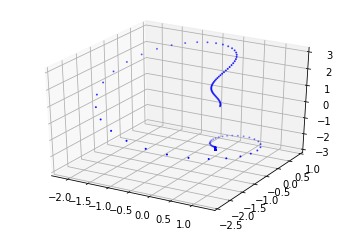

In [89]:
p = {'a' : 0.95, 'b' : 0.7, 'c' : 0.6, 'd' : 3.5, 'e' : 0.25, 'f' : 0.1}
x,y,z = aizawa_iterator(time=5000000, **p)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, color='blue',s=1)

plt.show()

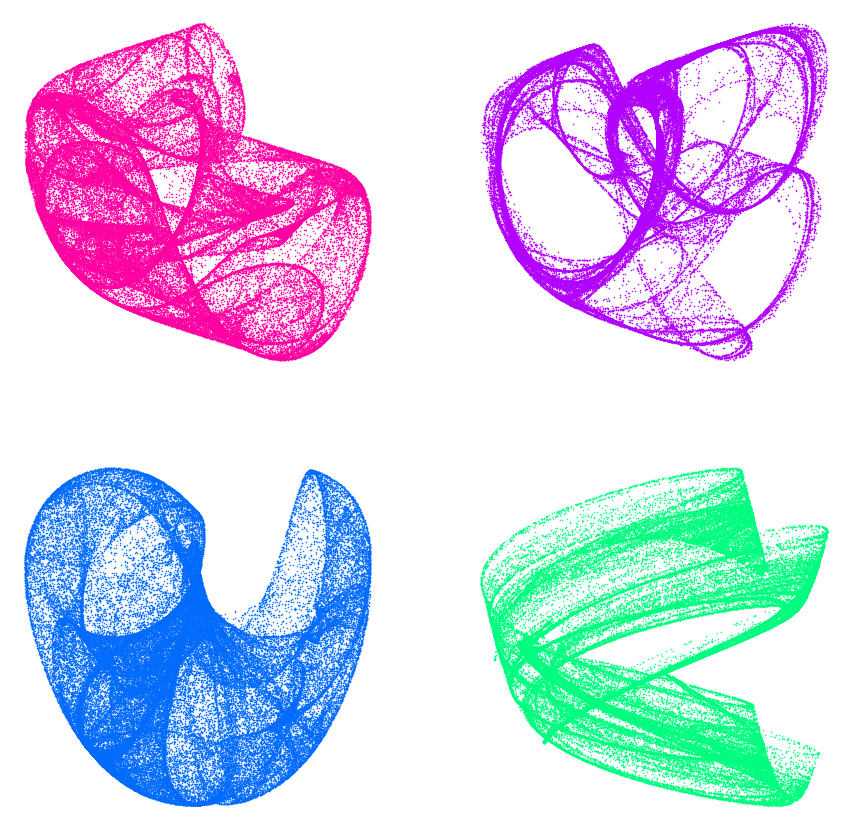

In [62]:
s0 = {'a':2, 'b':1.4, 'c':0.49, 'd':2.68}
sparse = {'a':2, 'b':1.4, 'c':-0.49, 'd':-2.68}
s1 = {'a':1.4, 'b':-2.3, 'c':2.4, 'd':-2.2}
s2 = {'a':0.2, 'b':-5, 'c':3, 'd':-1}

plt.figure(figsize=(15,15))
i=1
for params, color in zip([s0,sparse,s1,s2], ['#fc03a1', '#b103fc', '#036bfc', '#03fc80']):
    plt.subplot(2,2,i)
    x,y = dejong_iterator(time=100000, **params)
    plt.scatter(x,y,s=0.3,color=color)
    plt.axis('off')
    i+=1

plt.show()

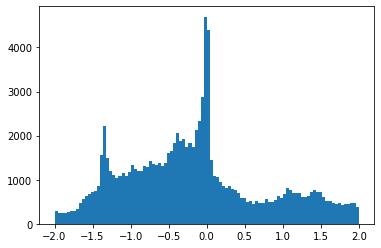

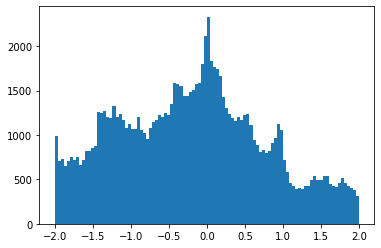

In [47]:
plt.hist(x,bins=100)
plt.show()
plt.hist(y,bins=100); plt.show()